In [1]:
from fastai.imports import*
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

In [3]:
dataset = pd.read_csv("DatasetCompletoDiario.csv",sep=";");
dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


dataset= dataset.sort_values(['Data'])


In [4]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['VolVarejo'].reset_index(drop=True, inplace=True)
dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
dataset['IndsBebida'].reset_index(drop=True, inplace=True)
dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
dataset['IndsMetal'].reset_index(drop=True, inplace=True)
dataset['IndsTextil'].reset_index(drop=True, inplace=True)
dataset['IndsTransf'].reset_index(drop=True, inplace=True)
dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = dataset['PrecoDolar'].values
df['QtdVendas'] = dataset['QtdVendas'].values
df['VolVarejo'] = dataset['VolVarejo'].values
df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['IndsBebida'] = dataset['IndsBebida'].values
df['IndsMaquina'] = dataset['IndsMaquina'].values
df['IndsMetal'] = dataset['IndsMetal'].values
df['IndsTextil'] = dataset['IndsTextil'].values
df['IndsTransf'] = dataset['IndsTransf'].values
df['IndsAlimen'] = dataset['IndsAlimen'].values


In [5]:
#dataset = dataset.dropna(how='all')
dataset['QtdVendas'] = dataset['QtdVendas'].replace([np.inf, -np.inf], np.nan)
dataset=dataset.dropna()

In [6]:
df_semVenda, y, nas = proc_df(df, 'QtdVendas')

In [7]:
#FUNÇÃO REPARTIR O DATASET EM TRAIN E TEST
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid =  130                          #(10% do dataset para validação)
n_trn = len(df_semVenda)-n_valid
raw_train, raw_valid = split_vals(df,n_trn)
train_features, test_features = split_vals(df_semVenda, n_trn)   ### train_features, test_features
train_labels, test_labels = split_vals(y, n_trn)             ### train_labels, test_labels   ##test_features, test_labels

train_features.shape, test_labels.shape, test_features.shape

((1175, 9), (130,), (130, 9))

In [16]:
GridSearch_model = RandomForestRegressor(n_estimators = 10,min_samples_split=9,min_samples_leaf=9, max_features=2,max_depth=135)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

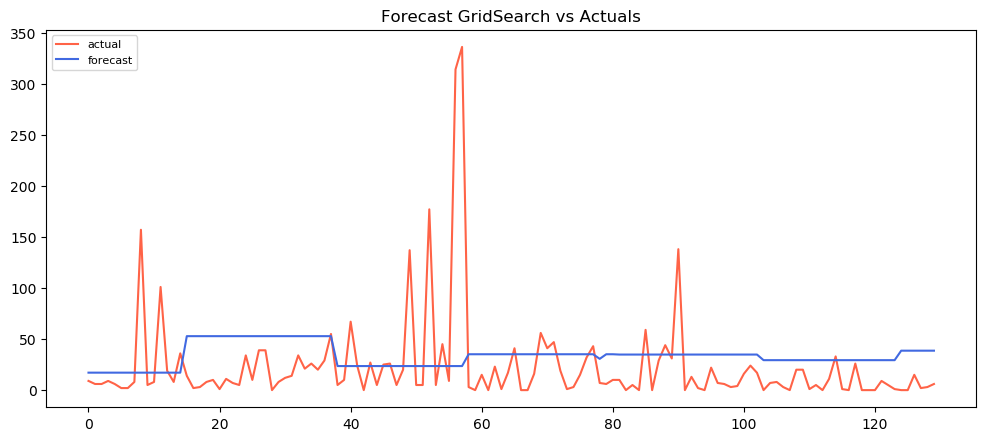

In [17]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [18]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 10.20418320206349,
 'mae': 31.463384459271435,
 'mpe': inf,
 'rmse': 51.44530599125639,
 'corr': -0.15401259489410987,
 'minmax': 0.673045714917063}

In [13]:
fi = rf_feat_importance(GridSearch_model, df_semVenda)
fi[:10]

,cols,imp
0,PrecoDolar,0.317780
8,IndsAlimen,0.130360
5,IndsMetal,0.104928
2,FaturamentoIndust,0.104662
7,IndsTransf,0.104493
1,VolVarejo,0.073833
3,IndsBebida,0.068193
6,IndsTextil,0.063001
4,IndsMaquina,0.032750


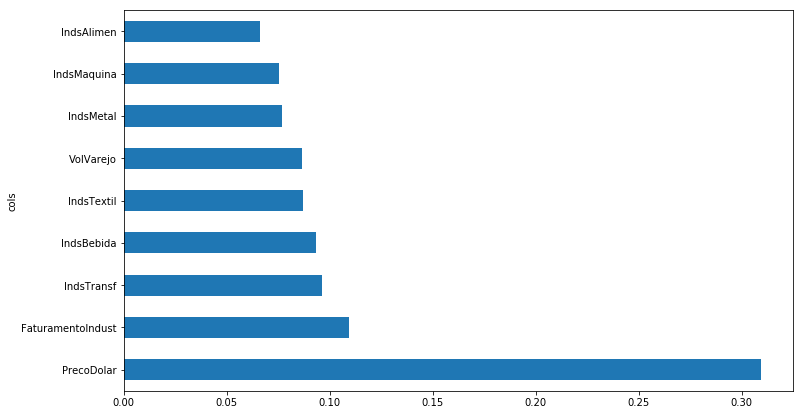

In [49]:
fi.imp.sum()
def plot_fi(fi):
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

# Aplicando LAG 30

In [134]:
dataset = pd.read_csv("DatasetCompletoDiario.csv",sep=";");
dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


dataset= dataset.sort_values(['Data'])

In [135]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['VolVarejo'].reset_index(drop=True, inplace=True)
dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
dataset['IndsBebida'].reset_index(drop=True, inplace=True)
dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
dataset['IndsMetal'].reset_index(drop=True, inplace=True)
dataset['IndsTextil'].reset_index(drop=True, inplace=True)
dataset['IndsTransf'].reset_index(drop=True, inplace=True)
dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = dataset['PrecoDolar'].values
df['QtdVendas'] = dataset['QtdVendas'].values
df['VolVarejo'] = dataset['VolVarejo'].values
df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['IndsBebida'] = dataset['IndsBebida'].values
df['IndsMaquina'] = dataset['IndsMaquina'].values
df['IndsMetal'] = dataset['IndsMetal'].values
df['IndsTextil'] = dataset['IndsTextil'].values
df['IndsTransf'] = dataset['IndsTransf'].values
df['IndsAlimen'] = dataset['IndsAlimen'].values
###################### criando os features com LAGS
df['LAG PrecoDolar'] = dataset['PrecoDolar'].values
#df['LAG QtdVendas'] = dataset['QtdVendas'].values
df['LAG VolVarejo'] = dataset['VolVarejo'].values
df['LAG FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['LAG IndsBebida'] = dataset['IndsBebida'].values
df['LAG IndsMaquina'] = dataset['IndsMaquina'].values
df['LAG IndsMetal'] = dataset['IndsMetal'].values
df['LAG IndsTextil'] = dataset['IndsTextil'].values
df['LAG IndsTransf'] = dataset['IndsTransf'].values
df['LAG IndsAlimen'] = dataset['IndsAlimen'].values



In [136]:
################ DEFININDO O LAG (substindo os NAN por ZERO)
lag = 30
############## Aplicando o Lag
df['LAG PrecoDolar'] = df['PrecoDolar'].shift(lag, axis=0)
#df['LAG QtdVendas'] =  df['QtdVendas'].shift(lag, axis=0)
df['LAG VolVarejo'] = df['VolVarejo'].shift(lag, axis=0)
df['LAG FaturamentoIndust'] = df['FaturamentoIndust'].shift(lag, axis=0)
df['LAG IndsBebida'] = df['IndsBebida'].shift(lag, axis=0)
df['LAG IndsMaquina'] = df['IndsMaquina'].shift(lag, axis=0)
df['LAG IndsMetal'] = df['IndsMetal'].shift(lag, axis=0)
df['LAG IndsTextil'] = df['IndsTextil'].shift(lag, axis=0)
df['LAG IndsTransf'] = df['IndsTransf'].shift(lag, axis=0)
df['LAG IndsAlimen'] = df['IndsAlimen'].shift(lag, axis=0)

################## Substindo os NAN por ZERO)
df['LAG PrecoDolar'].fillna(0, inplace=True)
#df['LAG QtdVendas'].fillna(0, inplace=True)
df['LAG VolVarejo'].fillna(0, inplace=True)
df['LAG FaturamentoIndust'] .fillna(0, inplace=True)
df['LAG IndsBebida'].fillna(0, inplace=True)
df['LAG IndsMaquina'].fillna(0, inplace=True)
df['LAG IndsMetal'].fillna(0, inplace=True)
df['LAG IndsTextil'].fillna(0, inplace=True)
df['LAG IndsTransf'].fillna(0, inplace=True)
df['LAG IndsAlimen'].fillna(0, inplace=True)

In [137]:
df.head()

,PrecoDolar,QtdVendas,VolVarejo,FaturamentoIndust,IndsBebida,IndsMaquina,IndsMetal,IndsTextil,IndsTransf,IndsAlimen,LAG PrecoDolar,LAG VolVarejo,LAG FaturamentoIndust,LAG IndsBebida,LAG IndsMaquina,LAG IndsMetal,LAG IndsTextil,LAG IndsTransf,LAG IndsAlimen
Data,,,,,,,,,,,,,,,,,,,
2014-01-08,2.3773,28,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09,2.3954,0,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-10,2.3813,10,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2.3485,49,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-14,2.3611,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# RANDOM FOREST

In [138]:
df_semVenda, y, nas = proc_df(df, 'QtdVendas')

In [139]:
#FUNÇÃO REPARTIR O DATASET EM TRAIN E TEST
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid =  130                          #(20% do dataset para validação)
n_trn = len(df_semVenda)-n_valid
raw_train, raw_valid = split_vals(df,n_trn)
train_features, test_features = split_vals(df_semVenda, n_trn)   ### train_features, test_features
train_labels, test_labels = split_vals(y, n_trn)             ### train_labels, test_labels   ##test_features, test_labels

train_features.shape, test_labels.shape, test_features.shape

((1175, 18), (130,), (130, 18))

### Grid Search with Cross Validation

In [140]:
# from sklearn.model_selection import GridSearchCV
# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [10, 50, 90, 120, 150, 200],
#     'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
#     'min_samples_leaf': [3, 4, 5, 6, 7, 9],
#     'min_samples_split': [8, 10, 12, 14, 16],
#     'n_estimators': [100, 200, 300, 400, 500, 600, 700,800,900, 1000, 1100, 1500, 2000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [141]:
# # Fit the grid search to the data
# grid_search.fit(train_features, train_labels)
# grid_search.best_params_

In [142]:
######################    r2 = 24%
# GridSearch_model = RandomForestRegressor(n_estimators = 10,min_samples_split=9,min_samples_leaf=9, max_features=2,max_depth=135)
# GridSearch_model.fit(train_features,train_labels)
# predOtimizada2 = GridSearch_model.predict(test_features)

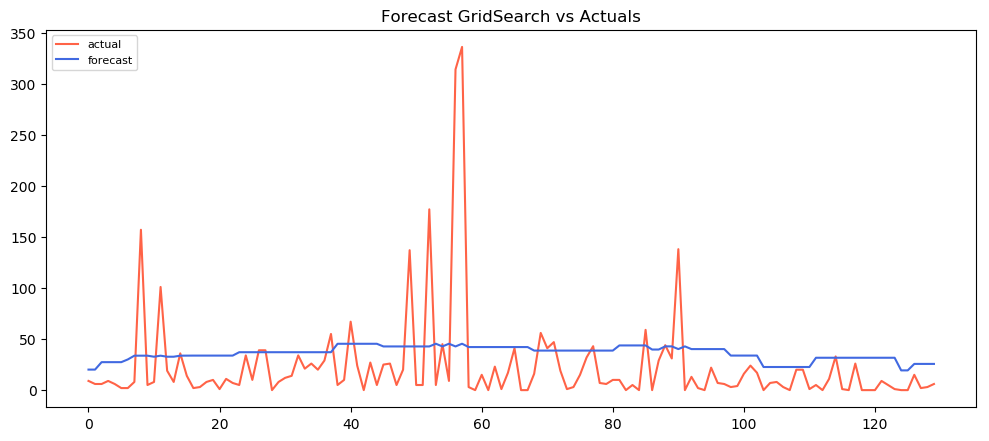

In [143]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [144]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 12.7539841974507,
 'mae': 30.852477115935148,
 'mpe': inf,
 'rmse': 48.14207641843155,
 'corr': 0.24351927761364509,
 'minmax': 0.6707516907671157}

In [145]:
#predOtimizada2.sum()  #4691
#test_labels.sum()    #3033

4691.017945668591

## IMPACTO DAS FEATURES LAG 30

In [146]:
fi = rf_feat_importance(GridSearch_model, df_semVenda)
fi[:19]

,cols,imp
9,LAG PrecoDolar,0.124005
0,PrecoDolar,0.106091
5,IndsMetal,0.084222
12,LAG IndsBebida,0.076607
6,IndsTextil,0.073607
1,VolVarejo,0.066599
10,LAG VolVarejo,0.058058
11,LAG FaturamentoIndust,0.055948
4,IndsMaquina,0.047454
2,FaturamentoIndust,0.045976


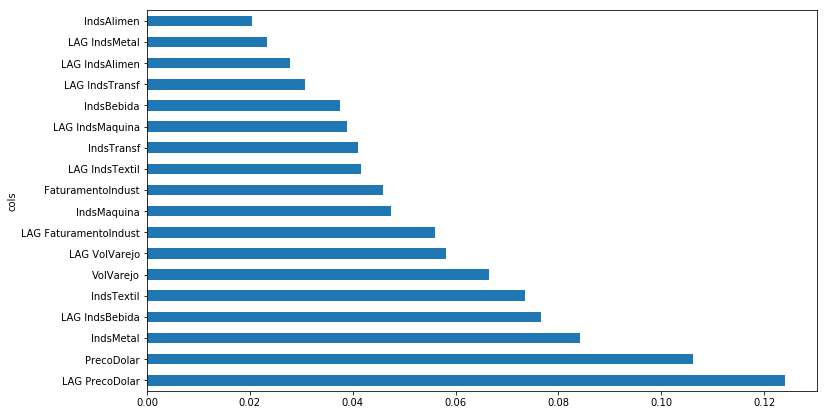

In [147]:
fi.imp.sum()
def plot_fi(fi):
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

## Aplicando LAG 60

In [275]:
dataset = pd.read_csv("C:\\Users\\Anthony\\Desktop\\dataset csv\\Diario\\DatasetCompletoDiario.csv",sep=";");
dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


dataset= dataset.sort_values(['Data'])

In [276]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['VolVarejo'].reset_index(drop=True, inplace=True)
dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
dataset['IndsBebida'].reset_index(drop=True, inplace=True)
dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
dataset['IndsMetal'].reset_index(drop=True, inplace=True)
dataset['IndsTextil'].reset_index(drop=True, inplace=True)
dataset['IndsTransf'].reset_index(drop=True, inplace=True)
dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = dataset['PrecoDolar'].values
df['QtdVendas'] = dataset['QtdVendas'].values
df['VolVarejo'] = dataset['VolVarejo'].values
df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['IndsBebida'] = dataset['IndsBebida'].values
df['IndsMaquina'] = dataset['IndsMaquina'].values
df['IndsMetal'] = dataset['IndsMetal'].values
df['IndsTextil'] = dataset['IndsTextil'].values
df['IndsTransf'] = dataset['IndsTransf'].values
df['IndsAlimen'] = dataset['IndsAlimen'].values
###################### criando os features com LAGS
df['LAG PrecoDolar'] = dataset['PrecoDolar'].values
#df['LAG QtdVendas'] = dataset['QtdVendas'].values
df['LAG VolVarejo'] = dataset['VolVarejo'].values
df['LAG FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['LAG IndsBebida'] = dataset['IndsBebida'].values
df['LAG IndsMaquina'] = dataset['IndsMaquina'].values
df['LAG IndsMetal'] = dataset['IndsMetal'].values
df['LAG IndsTextil'] = dataset['IndsTextil'].values
df['LAG IndsTransf'] = dataset['IndsTransf'].values
df['LAG IndsAlimen'] = dataset['IndsAlimen'].values

In [277]:
################ DEFININDO O LAG (substindo os NAN por ZERO)
lag = 60
############## Aplicando o Lag
df['LAG PrecoDolar'] = df['PrecoDolar'].shift(lag, axis=0)
#df['LAG QtdVendas'] =  df['QtdVendas'].shift(lag, axis=0)
df['LAG VolVarejo'] = df['VolVarejo'].shift(lag, axis=0)
df['LAG FaturamentoIndust'] = df['FaturamentoIndust'].shift(lag, axis=0)
df['LAG IndsBebida'] = df['IndsBebida'].shift(lag, axis=0)
df['LAG IndsMaquina'] = df['IndsMaquina'].shift(lag, axis=0)
df['LAG IndsMetal'] = df['IndsMetal'].shift(lag, axis=0)
df['LAG IndsTextil'] = df['IndsTextil'].shift(lag, axis=0)
df['LAG IndsTransf'] = df['IndsTransf'].shift(lag, axis=0)
df['LAG IndsAlimen'] = df['IndsAlimen'].shift(lag, axis=0)

################## Substindo os NAN por ZERO)
df['LAG PrecoDolar'].fillna(0, inplace=True)
#df['LAG QtdVendas'].fillna(0, inplace=True)
df['LAG VolVarejo'].fillna(0, inplace=True)
df['LAG FaturamentoIndust'] .fillna(0, inplace=True)
df['LAG IndsBebida'].fillna(0, inplace=True)
df['LAG IndsMaquina'].fillna(0, inplace=True)
df['LAG IndsMetal'].fillna(0, inplace=True)
df['LAG IndsTextil'].fillna(0, inplace=True)
df['LAG IndsTransf'].fillna(0, inplace=True)
df['LAG IndsAlimen'].fillna(0, inplace=True)

In [278]:
df.head()

,PrecoDolar,QtdVendas,VolVarejo,FaturamentoIndust,IndsBebida,IndsMaquina,IndsMetal,IndsTextil,IndsTransf,IndsAlimen,LAG PrecoDolar,LAG VolVarejo,LAG FaturamentoIndust,LAG IndsBebida,LAG IndsMaquina,LAG IndsMetal,LAG IndsTextil,LAG IndsTransf,LAG IndsAlimen
Data,,,,,,,,,,,,,,,,,,,
2014-01-08,2.3773,28,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09,2.3954,0,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-10,2.3813,10,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2.3485,49,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-14,2.3611,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
df_semVenda, y, nas = proc_df(df, 'QtdVendas')

In [280]:
#FUNÇÃO REPARTIR O DATASET EM TRAIN E TEST
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid =  130                          #(20% do dataset para validação)
n_trn = len(df_semVenda)-n_valid
raw_train, raw_valid = split_vals(df,n_trn)
train_features, test_features = split_vals(df_semVenda, n_trn)   ### train_features, test_features
train_labels, test_labels = split_vals(y, n_trn)             ### train_labels, test_labels   ##test_features, test_labels

train_features.shape, test_labels.shape, test_features.shape

((1175, 18), (130,), (130, 18))

In [281]:
GridSearch_model = RandomForestRegressor(n_estimators = 10,min_samples_split=9,min_samples_leaf=9, max_features=2,max_depth=135)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

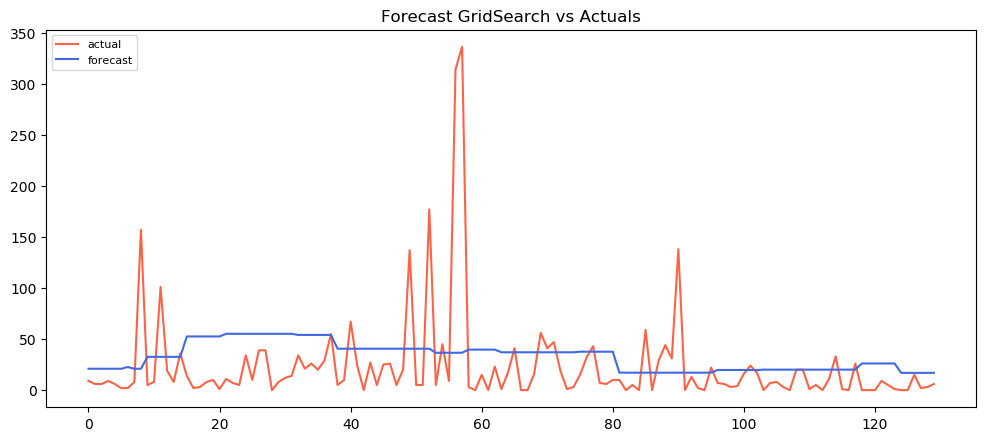

In [282]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [283]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 9.317138102361476,
 'mae': 29.92175351888926,
 'mpe': inf,
 'rmse': 49.24126722260517,
 'corr': 0.08100816897874467,
 'minmax': 0.6731555461995877}

## IMPACTO DAS FEATURES LAG 60

In [286]:
fi = rf_feat_importance(base_model, df_semVenda)
fi[:19]

,cols,imp
0,PrecoDolar,0.117323
9,LAG PrecoDolar,0.106970
1,VolVarejo,0.094268
2,FaturamentoIndust,0.064484
15,LAG IndsTextil,0.060249
13,LAG IndsMaquina,0.056342
5,IndsMetal,0.052670
3,IndsBebida,0.051361
14,LAG IndsMetal,0.051126
11,LAG FaturamentoIndust,0.049316


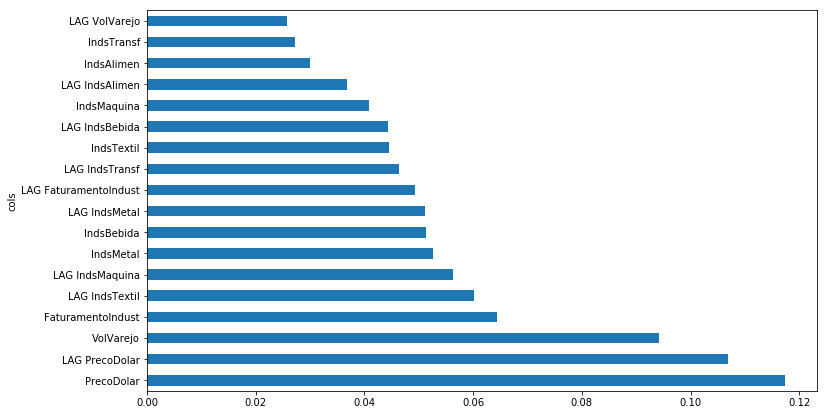

In [287]:
fi.imp.sum()
def plot_fi(fi):
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

## Aplicando LAG 90

In [336]:
dataset = pd.read_csv("C:\\Users\\Anthony\\Desktop\\dataset csv\\Diario\\DatasetCompletoDiario.csv",sep=";");
dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


dataset= dataset.sort_values(['Data'])

In [337]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['VolVarejo'].reset_index(drop=True, inplace=True)
dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
dataset['IndsBebida'].reset_index(drop=True, inplace=True)
dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
dataset['IndsMetal'].reset_index(drop=True, inplace=True)
dataset['IndsTextil'].reset_index(drop=True, inplace=True)
dataset['IndsTransf'].reset_index(drop=True, inplace=True)
dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = dataset['PrecoDolar'].values
df['QtdVendas'] = dataset['QtdVendas'].values
df['VolVarejo'] = dataset['VolVarejo'].values
df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['IndsBebida'] = dataset['IndsBebida'].values
df['IndsMaquina'] = dataset['IndsMaquina'].values
df['IndsMetal'] = dataset['IndsMetal'].values
df['IndsTextil'] = dataset['IndsTextil'].values
df['IndsTransf'] = dataset['IndsTransf'].values
df['IndsAlimen'] = dataset['IndsAlimen'].values
###################### criando os features com LAGS
df['LAG PrecoDolar'] = dataset['PrecoDolar'].values
#df['LAG QtdVendas'] = dataset['QtdVendas'].values
df['LAG VolVarejo'] = dataset['VolVarejo'].values
df['LAG FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['LAG IndsBebida'] = dataset['IndsBebida'].values
df['LAG IndsMaquina'] = dataset['IndsMaquina'].values
df['LAG IndsMetal'] = dataset['IndsMetal'].values
df['LAG IndsTextil'] = dataset['IndsTextil'].values
df['LAG IndsTransf'] = dataset['IndsTransf'].values
df['LAG IndsAlimen'] = dataset['IndsAlimen'].values

In [338]:
################ DEFININDO O LAG (substindo os NAN por ZERO)
lag = 90
############## Aplicando o Lag
df['LAG PrecoDolar'] = df['PrecoDolar'].shift(lag, axis=0)
#df['LAG QtdVendas'] =  df['QtdVendas'].shift(lag, axis=0)
df['LAG VolVarejo'] = df['VolVarejo'].shift(lag, axis=0)
df['LAG FaturamentoIndust'] = df['FaturamentoIndust'].shift(lag, axis=0)
df['LAG IndsBebida'] = df['IndsBebida'].shift(lag, axis=0)
df['LAG IndsMaquina'] = df['IndsMaquina'].shift(lag, axis=0)
df['LAG IndsMetal'] = df['IndsMetal'].shift(lag, axis=0)
df['LAG IndsTextil'] = df['IndsTextil'].shift(lag, axis=0)
df['LAG IndsTransf'] = df['IndsTransf'].shift(lag, axis=0)
df['LAG IndsAlimen'] = df['IndsAlimen'].shift(lag, axis=0)

################## Substindo os NAN por ZERO)
df['LAG PrecoDolar'].fillna(0, inplace=True)
#df['LAG QtdVendas'].fillna(0, inplace=True)
df['LAG VolVarejo'].fillna(0, inplace=True)
df['LAG FaturamentoIndust'] .fillna(0, inplace=True)
df['LAG IndsBebida'].fillna(0, inplace=True)
df['LAG IndsMaquina'].fillna(0, inplace=True)
df['LAG IndsMetal'].fillna(0, inplace=True)
df['LAG IndsTextil'].fillna(0, inplace=True)
df['LAG IndsTransf'].fillna(0, inplace=True)
df['LAG IndsAlimen'].fillna(0, inplace=True)

In [339]:
df.head()

,PrecoDolar,QtdVendas,VolVarejo,FaturamentoIndust,IndsBebida,IndsMaquina,IndsMetal,IndsTextil,IndsTransf,IndsAlimen,LAG PrecoDolar,LAG VolVarejo,LAG FaturamentoIndust,LAG IndsBebida,LAG IndsMaquina,LAG IndsMetal,LAG IndsTextil,LAG IndsTransf,LAG IndsAlimen
Data,,,,,,,,,,,,,,,,,,,
2014-01-08,2.3773,28,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-09,2.3954,0,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-10,2.3813,10,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-13,2.3485,49,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-14,2.3611,24,99.2,116.2,95.4,161.2,95.0,106.2,116.2,106.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [340]:
df_semVenda, y, nas = proc_df(df, 'QtdVendas')
#FUNÇÃO REPARTIR O DATASET EM TRAIN E TEST
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid =  130                          #(20% do dataset para validação)
n_trn = len(df_semVenda)-n_valid
raw_train, raw_valid = split_vals(df,n_trn)
train_features, test_features = split_vals(df_semVenda, n_trn)   ### train_features, test_features
train_labels, test_labels = split_vals(y, n_trn)             ### train_labels, test_labels   ##test_features, test_labels

train_features.shape, test_labels.shape, test_features.shape

((1175, 18), (130,), (130, 18))

In [341]:
GridSearch_model = RandomForestRegressor(n_estimators = 10,min_samples_split=9,min_samples_leaf=9, max_features=2,max_depth=135)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

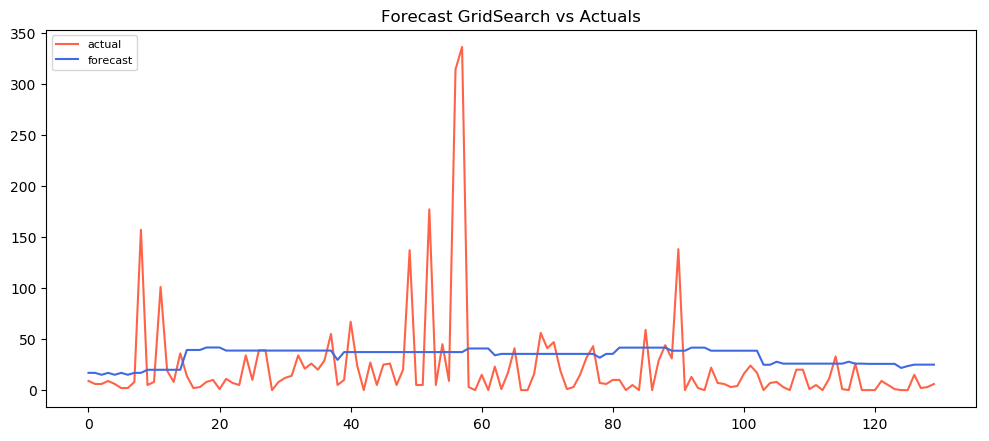

In [342]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [343]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 9.809238580668891,
 'mae': 29.55819299752779,
 'mpe': inf,
 'rmse': 48.56586383277788,
 'corr': 0.08716122643176845,
 'minmax': 0.6627793489447454}

In [344]:
fi = rf_feat_importance(base_model, df_semVenda)
fi[:19]

,cols,imp
0,PrecoDolar,0.117323
9,LAG PrecoDolar,0.106970
1,VolVarejo,0.094268
2,FaturamentoIndust,0.064484
15,LAG IndsTextil,0.060249
13,LAG IndsMaquina,0.056342
5,IndsMetal,0.052670
3,IndsBebida,0.051361
14,LAG IndsMetal,0.051126
11,LAG FaturamentoIndust,0.049316


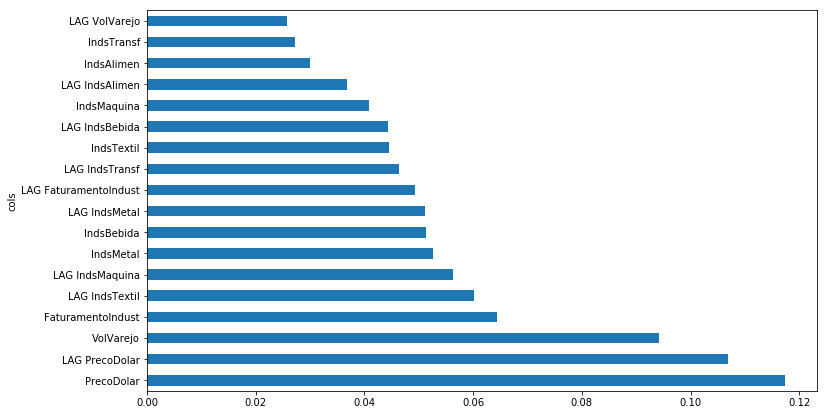

In [345]:
fi.imp.sum()
def plot_fi(fi):
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

# Aplicando LAG 120

In [395]:
dataset = pd.read_csv("C:\\Users\\Anthony\\Desktop\\dataset csv\\Diario\\DatasetCompletoDiario.csv",sep=";");
dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


dataset= dataset.sort_values(['Data'])

In [396]:
# CRIANDO  DATAFRAME

range = dataset.Data
df=pd.DataFrame(index = dataset.Data)

dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
dataset['QtdVendas'].reset_index(drop=True, inplace=True)
dataset['VolVarejo'].reset_index(drop=True, inplace=True)
dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
dataset['IndsBebida'].reset_index(drop=True, inplace=True)
dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
dataset['IndsMetal'].reset_index(drop=True, inplace=True)
dataset['IndsTextil'].reset_index(drop=True, inplace=True)
dataset['IndsTransf'].reset_index(drop=True, inplace=True)
dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

df['PrecoDolar'] = dataset['PrecoDolar'].values
df['QtdVendas'] = dataset['QtdVendas'].values
df['VolVarejo'] = dataset['VolVarejo'].values
df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['IndsBebida'] = dataset['IndsBebida'].values
df['IndsMaquina'] = dataset['IndsMaquina'].values
df['IndsMetal'] = dataset['IndsMetal'].values
df['IndsTextil'] = dataset['IndsTextil'].values
df['IndsTransf'] = dataset['IndsTransf'].values
df['IndsAlimen'] = dataset['IndsAlimen'].values
###################### criando os features com LAGS
df['LAG PrecoDolar'] = dataset['PrecoDolar'].values
#df['LAG QtdVendas'] = dataset['QtdVendas'].values
df['LAG VolVarejo'] = dataset['VolVarejo'].values
df['LAG FaturamentoIndust'] = dataset['FaturamentoIndust'].values
df['LAG IndsBebida'] = dataset['IndsBebida'].values
df['LAG IndsMaquina'] = dataset['IndsMaquina'].values
df['LAG IndsMetal'] = dataset['IndsMetal'].values
df['LAG IndsTextil'] = dataset['IndsTextil'].values
df['LAG IndsTransf'] = dataset['IndsTransf'].values
df['LAG IndsAlimen'] = dataset['IndsAlimen'].values

In [397]:
################ DEFININDO O LAG (substindo os NAN por ZERO)
lag = 120
############## Aplicando o Lag
df['LAG PrecoDolar'] = df['PrecoDolar'].shift(lag, axis=0)
#df['LAG QtdVendas'] =  df['QtdVendas'].shift(lag, axis=0)
df['LAG VolVarejo'] = df['VolVarejo'].shift(lag, axis=0)
df['LAG FaturamentoIndust'] = df['FaturamentoIndust'].shift(lag, axis=0)
df['LAG IndsBebida'] = df['IndsBebida'].shift(lag, axis=0)
df['LAG IndsMaquina'] = df['IndsMaquina'].shift(lag, axis=0)
df['LAG IndsMetal'] = df['IndsMetal'].shift(lag, axis=0)
df['LAG IndsTextil'] = df['IndsTextil'].shift(lag, axis=0)
df['LAG IndsTransf'] = df['IndsTransf'].shift(lag, axis=0)
df['LAG IndsAlimen'] = df['IndsAlimen'].shift(lag, axis=0)

################## Substindo os NAN por ZERO)
df['LAG PrecoDolar'].fillna(0, inplace=True)
#df['LAG QtdVendas'].fillna(0, inplace=True)
df['LAG VolVarejo'].fillna(0, inplace=True)
df['LAG FaturamentoIndust'] .fillna(0, inplace=True)
df['LAG IndsBebida'].fillna(0, inplace=True)
df['LAG IndsMaquina'].fillna(0, inplace=True)
df['LAG IndsMetal'].fillna(0, inplace=True)
df['LAG IndsTextil'].fillna(0, inplace=True)
df['LAG IndsTransf'].fillna(0, inplace=True)
df['LAG IndsAlimen'].fillna(0, inplace=True)

In [398]:
df_semVenda, y, nas = proc_df(df, 'QtdVendas')
#FUNÇÃO REPARTIR O DATASET EM TRAIN E TEST
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

n_valid =  120                          #(20% do dataset para validação)
n_trn = len(df_semVenda)-n_valid
raw_train, raw_valid = split_vals(df,n_trn)
train_features, test_features = split_vals(df_semVenda, n_trn)   ### train_features, test_features
train_labels, test_labels = split_vals(y, n_trn)             ### train_labels, test_labels   ##test_features, test_labels

train_features.shape, test_labels.shape, test_features.shape

((1185, 18), (120,), (120, 18))

In [399]:
GridSearch_model = RandomForestRegressor(n_estimators = 10,min_samples_split=9,min_samples_leaf=9, max_features=2,max_depth=135)
GridSearch_model.fit(train_features,train_labels)
predOtimizada2 = GridSearch_model.predict(test_features)

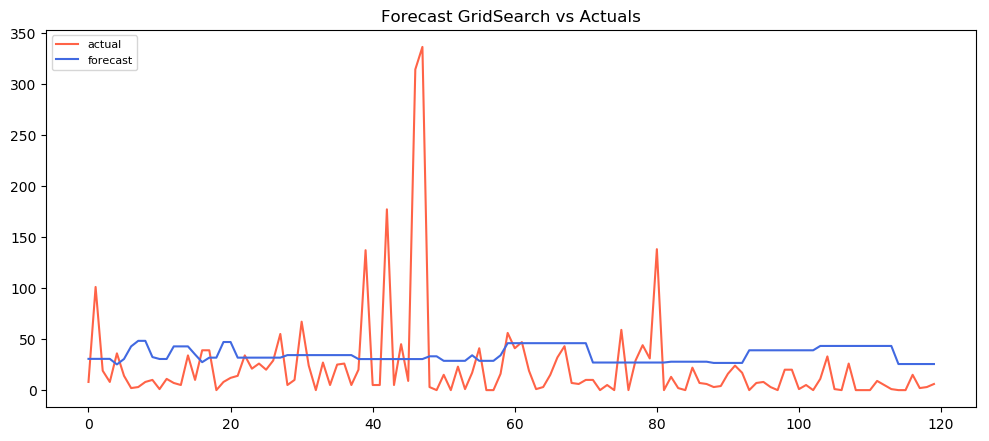

In [400]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [401]:
import sys
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


{'mape': inf,
 'me': 10.901223182118807,
 'mae': 30.977176768304012,
 'mpe': inf,
 'rmse': 50.341812968169336,
 'corr': -0.12177467061044951,
 'minmax': 0.6664850096685317}

In [402]:
fi = rf_feat_importance(base_model, df_semVenda)
fi[:19]

,cols,imp
0,PrecoDolar,0.117323
9,LAG PrecoDolar,0.106970
1,VolVarejo,0.094268
2,FaturamentoIndust,0.064484
15,LAG IndsTextil,0.060249
13,LAG IndsMaquina,0.056342
5,IndsMetal,0.052670
3,IndsBebida,0.051361
14,LAG IndsMetal,0.051126
11,LAG FaturamentoIndust,0.049316


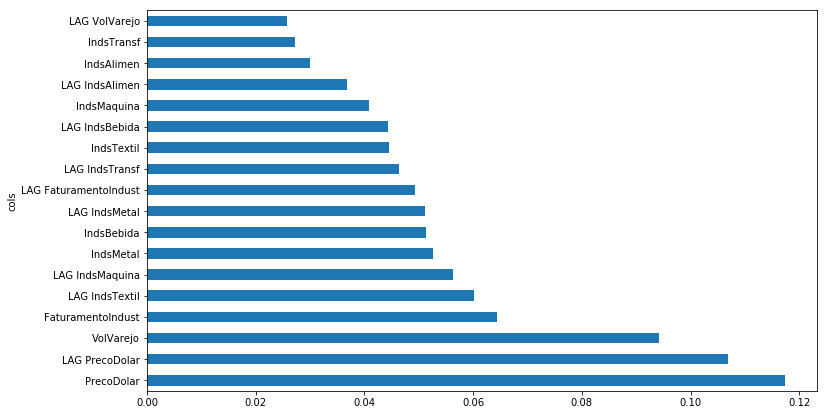

In [403]:
fi.imp.sum()
def plot_fi(fi):
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);